# CellMap for hippocampus cell data

The tutorial for hippocampus cell data ([La Manno et al. (2018)](https://doi.org/10.1038/s41586-018-0414-6)).


[RECODE](https://github.com/yusuke-imoto-lab/RECODE) is used for the noise reduction.

## Regular procedure

In [1]:
import cellmap
import anndata
import matplotlib.pyplot as plt
import numpy as np
import scanpy

The dataset is installed using the [scvelo](https://scvelo.readthedocs.io/en/stable/) package. 

In [2]:
import scvelo as scv
adata = scv.datasets.dentategyrus_lamanno()
adata

AnnData object with n_obs × n_vars = 18213 × 27998
    obs: 'Age', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'clusters_colors'
    obsm: 'X_tsne'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

Noise reduction by [RECODE](https://github.com/yusuke-imoto-lab/RECODE).

/home/yusukeimoto/.local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/yusukeimoto/.local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


start RECODE for scRNA-seq
end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': 12242, '#non-significant genes': 7644, '#silent genes': 8112, 'ell': 137, 'Elapsed time': datetime.timedelta(seconds=155, microseconds=299838)}


/home/yusukeimoto/.local/lib/python3.10/site-packages/screcode/screcode.py:568: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  dens = scipy.stats.kde.gaussian_kde(np.log10(norm_var[norm_var>0]))(x)


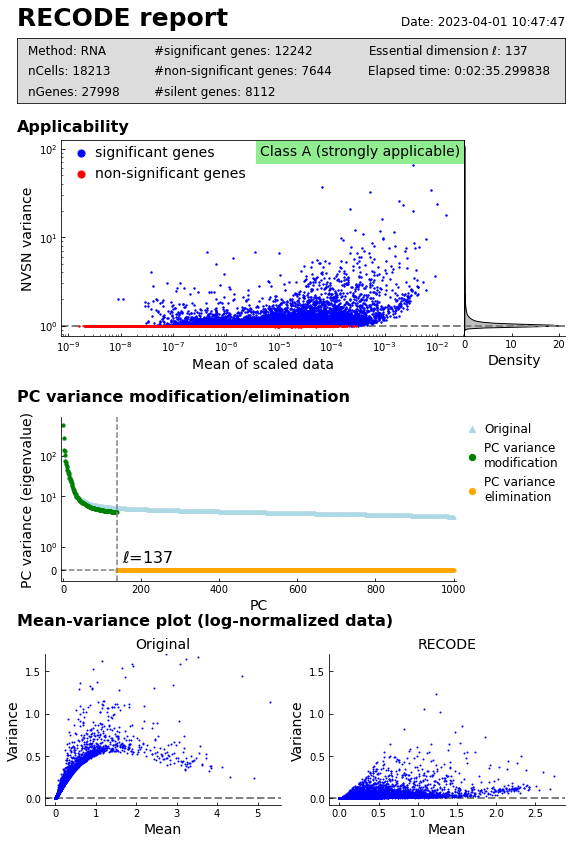

In [3]:
import screcode
recode = screcode.RECODE()
adata = recode.fit_transform(adata)
adata.obsm['RECODE_log'] = scanpy.pp.log1p(adata.obsm['RECODE'])
recode.report()

Compute velocity by scVelo (stochastic mode) and show the stream on UMAP. 

In [4]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.velocity(adata,mode='stochastic')
scv.tl.velocity_graph(adata)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors


2023-04-01 10:49:23.965701: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-01 10:49:23.969613: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 10:49:24.035603: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 10:49:24.040279: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 10:49:25.520300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

    finished (0:01:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:27) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:01:41) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/18213 [00:00<?, ?cells/s]

    finished (0:06:50) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:10) --> added
    'velocity_tsne', embedded velocity vectors (adata.obsm)


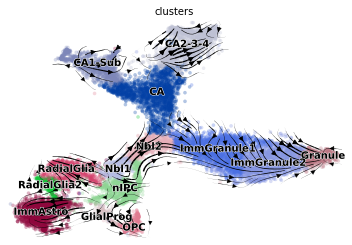

In [5]:
scv.pl.velocity_embedding_stream(adata)

In [6]:
%%time
import cellmap

cellmap.Hodge_decomposition(adata, exp_2d_key='X_tsne', vel_2d_key='velocity_tsne', alpha=0.1)

{'Contribution_ratio': {'Potential': '72.10%', 'Rotation': '27.90%'}}
CPU times: user 41min 17s, sys: 5min 20s, total: 46min 37s
Wall time: 13min 36s


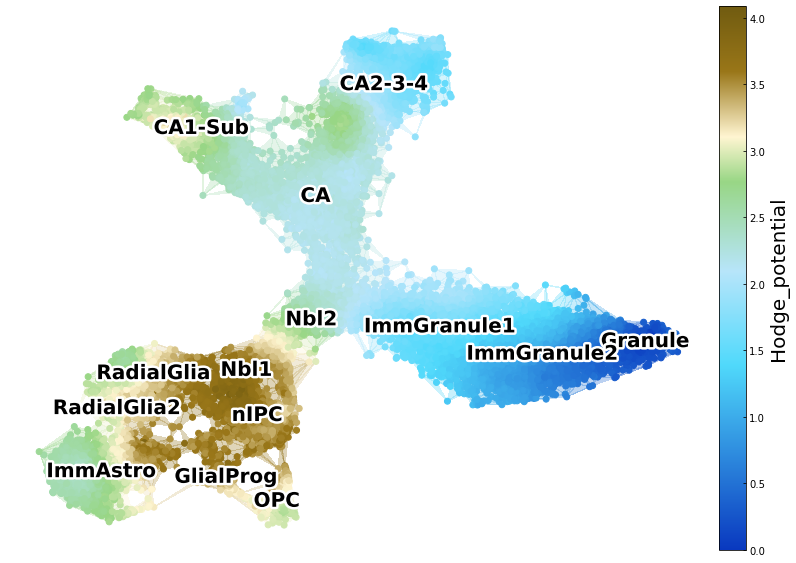

In [7]:
cellmap.view(adata, basis='X_tsne', show_graph = True, cluster_key='clusters')

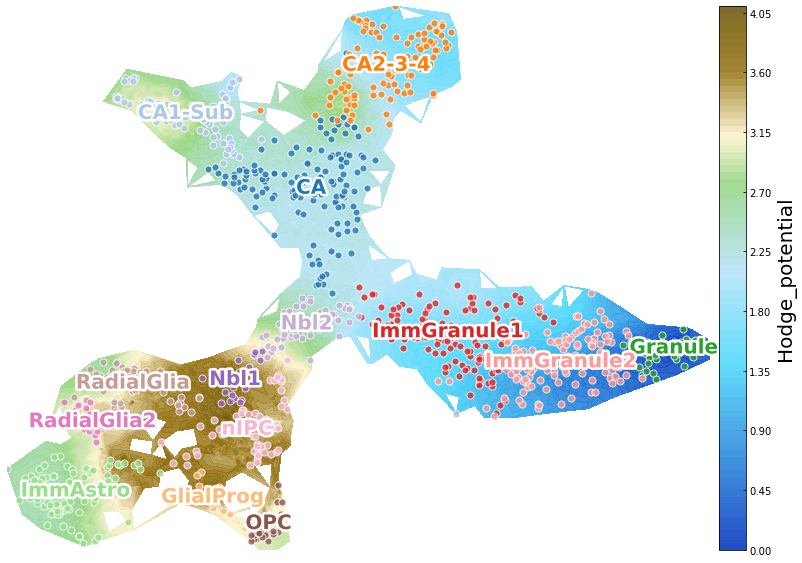

In [8]:
cellmap.view_cluster(adata, basis='X_tsne', show_graph=True, cluster_key='clusters', s=50)

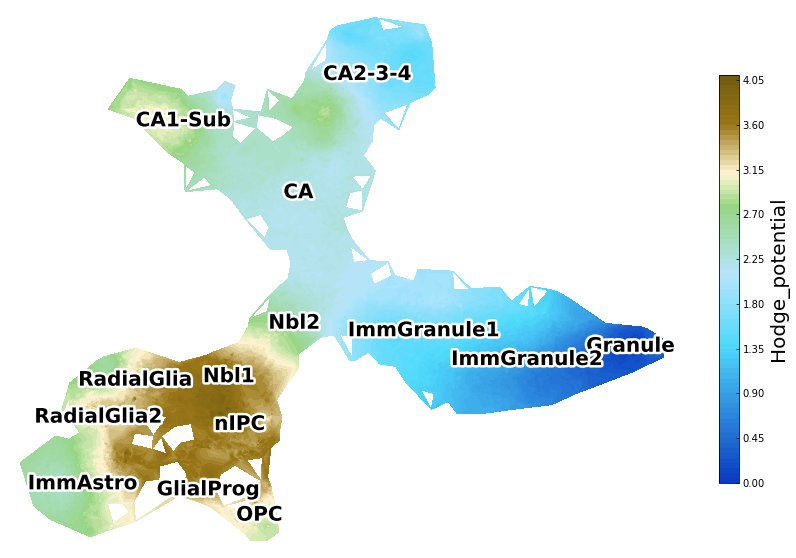

In [9]:
cellmap.view_surface(adata, basis='X_tsne', cluster_key ='clusters')

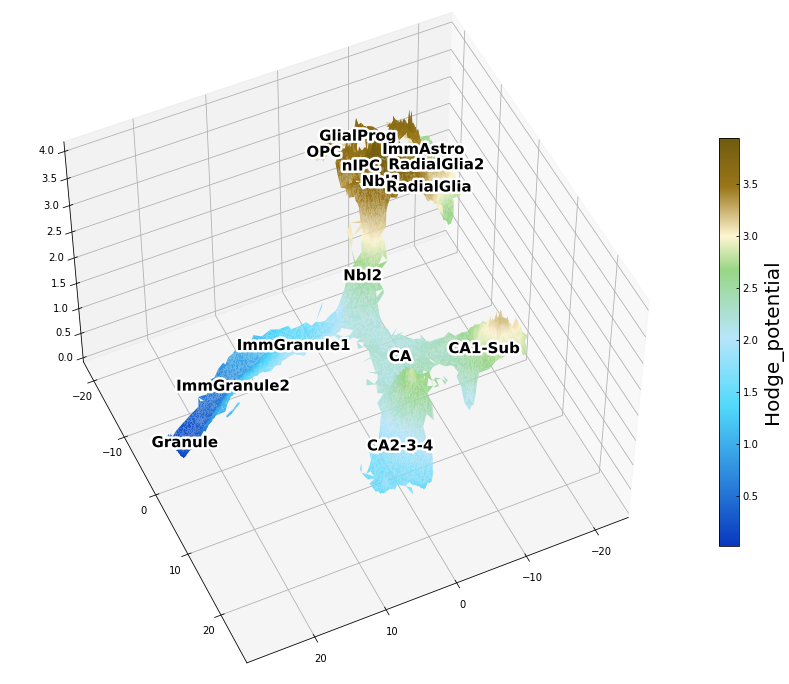

In [10]:
cellmap.view_surface_3D(adata, basis='X_tsne', cluster_key ='clusters', elev=50, azim=65)

500 18213 500


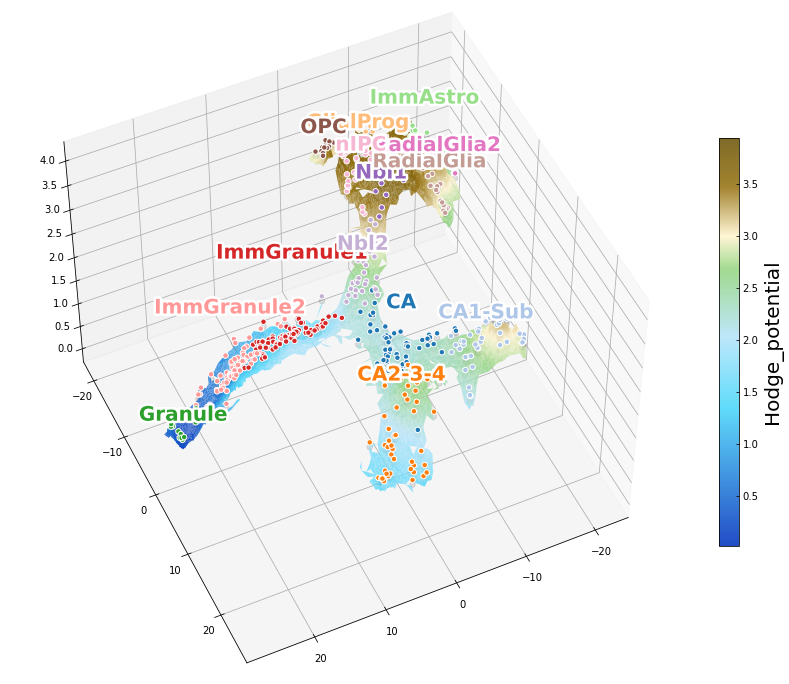

In [11]:
cellmap.view_surface_3D_cluster(adata, basis='X_tsne', cluster_key ='clusters',elev=50,azim=65,s=30);

### Write expression and potential data as CSV file for **[CellMap viewer](https://github.com/yusuke-imoto-lab/CellMapViewer)**. 

In [12]:
adata

AnnData object with n_obs × n_vars = 18213 × 27998
    obs: 'Age', 'clusters', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'Hodge_potential', 'Hodge_rotation'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'noise_variance_RECODE', 'normalized_variance_RECODE', 'significance_RECODE', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'clusters_colors', 'CellMap_log', 'CM_graph'
    obsm: 'X_tsne', 'RECODE', 'RECODE_log', 'X_pca', 'velocity_tsne'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [13]:
adata.layers['RECODE_log'] = scanpy.pp.log1p(adata.obsm['RECODE'])

In [14]:
cellmap.write(adata, basis='X_tsne', filename='CellMap_tutorial_hippocampus',genes=['Aqp4','Aldoc','Cdk1','Mki67','Eomes','Neurod2'],expression_key='RECODE_log')

succeeded in writing CellMapp data as "CellMap_tutorial_hippocampus.csv"
You can visualize the CDV file by CellMapp viewer https://yusuke-imoto-lab.github.io/CellMapViewer/CellMapViewer/viewer.html


,X,Y,Potential,Annotation,Aqp4,Aldoc,Cdk1,Mki67,Eomes,Neurod2,HVG_Nts,HVG_Gfap,HVG_Cenpa,HVG_Thrsp,HVG_Mfap4,HVG_2810417H13Rik,HVG_Aqp4,HVG_Xist,HVG_Igfbp5,HVG_Neurog2
CellID,,,,,,,,,,,,,,,,,,,,
10X83_2:AAACGGGGTCTCTTTAx,18.931086,-1.862429,0.969109,ImmGranule2,0.000000,0.135853,0.000000,0.070049,0.094784,0.542045,0.000000,0.194255,0.130009,0.000000,0.021277,0.114936,0.000000,0.284774,0.000000,0.062935
10X83_2:AACCATGGTTCAACCAx,18.419891,-1.282895,1.082080,ImmGranule2,0.000000,0.000000,0.020868,0.000000,0.132243,0.720612,0.208236,0.000000,0.024526,0.000000,0.000000,0.000000,0.000000,0.335931,0.000000,0.163673
10X83_2:AACACGTTCTGAAAGAx,2.369887,16.868419,2.456389,CA2-3-4,0.000000,0.543081,0.068154,0.107376,0.108528,0.895983,0.048838,0.428707,0.282093,0.000000,0.253046,0.201937,0.000000,1.180071,0.296973,0.029096
10X83_2:AAAGATGCATTGAGCTx,-5.351040,10.676485,2.334022,CA,0.015400,0.000000,0.017134,0.000000,0.017793,0.736043,0.000000,0.000000,0.000000,0.000000,0.025714,0.010188,0.015400,0.000000,0.007351,0.000000
10X83_2:AACCATGTCTACTTACx,-6.189126,11.754900,2.342551,CA1-Sub,0.222354,0.382781,0.000000,0.003505,0.099216,0.928333,0.000000,0.201511,0.000000,0.136181,0.000000,0.035300,0.222354,0.000000,0.108548,0.157412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X84_3:TTTCCTCCACCATCCTx,10.812611,-2.487668,1.485553,ImmGranule1,0.000000,0.000000,0.007024,0.000000,0.000000,0.653276,0.016754,0.000000,0.000000,0.143898,0.000000,0.000000,0.000000,0.230485,0.134278,0.252473
10X84_3:TTTGTCACATGAAGTAx,8.246204,23.482788,1.796498,CA2-3-4,0.000000,0.000000,0.000000,0.181097,0.000000,1.130165,0.951813,0.950110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10X84_3:TTTCCTCCACGGTAAGx,-3.441272,-4.917364,3.253834,nIPC,0.000000,0.000000,0.000000,0.117609,0.776456,0.000000,0.034497,0.000000,0.669607,0.507624,0.925526,0.674395,0.000000,0.000000,0.205219,0.661632


## Changing parameter $\alpha$

The parameter $\alpha$ adjust the rate of original/reduced dimensional information of gene expression and velocity. 

$\alpha=0$ uses only two-dimensional inormation; in contrast, $\alpha=1$ uses the original (non-dimensionaly reduction) information. 

In [15]:
alpha_set = [0,0.5,1]
for alpha in alpha_set:
    cellmap.Hodge_decomposition(adata, exp_2d_key='X_tsne', vel_2d_key='velocity_tsne',potential_key='Hodge_potential_%0.1f' % alpha,alpha=alpha)
adata

{'Contribution_ratio': {'Potential': '54.15%', 'Rotation': '45.85%'}}
{'Contribution_ratio': {'Potential': '85.64%', 'Rotation': '14.36%'}}
{'Contribution_ratio': {'Potential': '86.15%', 'Rotation': '13.85%'}}


AnnData object with n_obs × n_vars = 18213 × 27998
    obs: 'Age', 'clusters', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'Hodge_potential', 'Hodge_rotation', 'Hodge_potential_0.0', 'Hodge_potential_0.5', 'Hodge_potential_1.0'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'noise_variance_RECODE', 'normalized_variance_RECODE', 'significance_RECODE', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'clusters_colors', 'CellMap_log', 'CM_graph', 'hvg'
    obsm: 'X_tsne', 'RECODE', 'RECODE_log', 'X_pca', 'velocity_tsne'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity', 'RECODE_log'
    obsp: 'distances', 'connectivities'

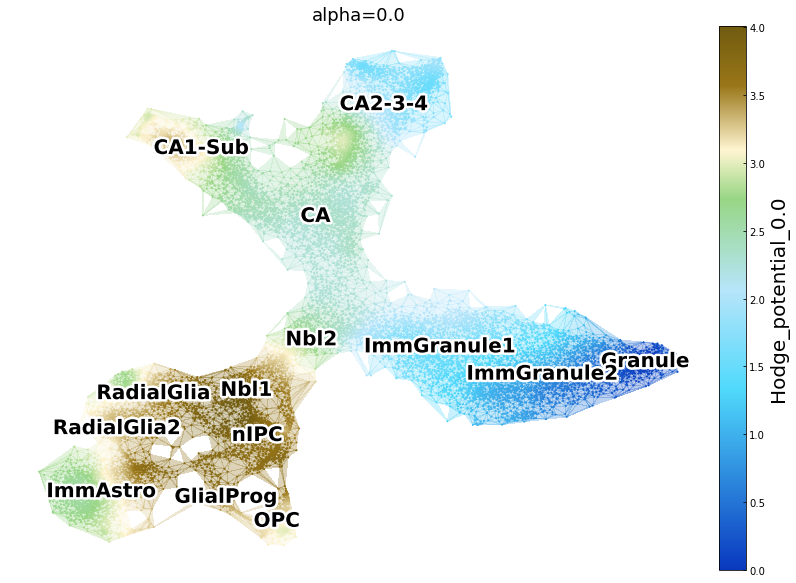

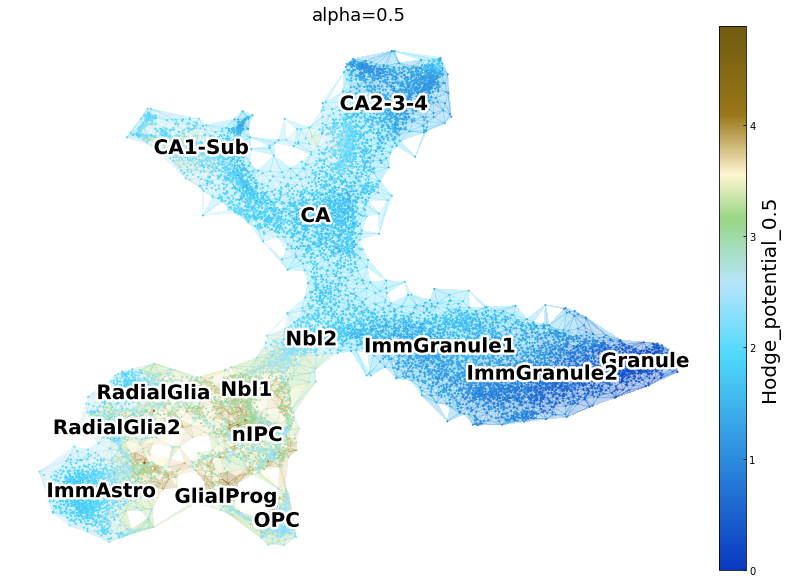

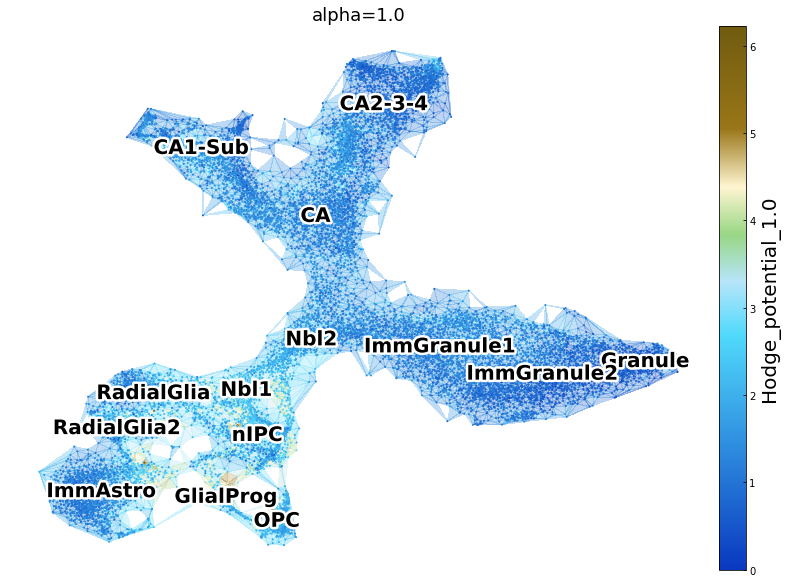

In [16]:
for alpha in alpha_set:
    cellmap.view(adata, basis='X_tsne', show_graph = True, potential_key='Hodge_potential_%0.1f' % alpha,cluster_key='clusters',title='alpha=%0.1f' % alpha,s=1)

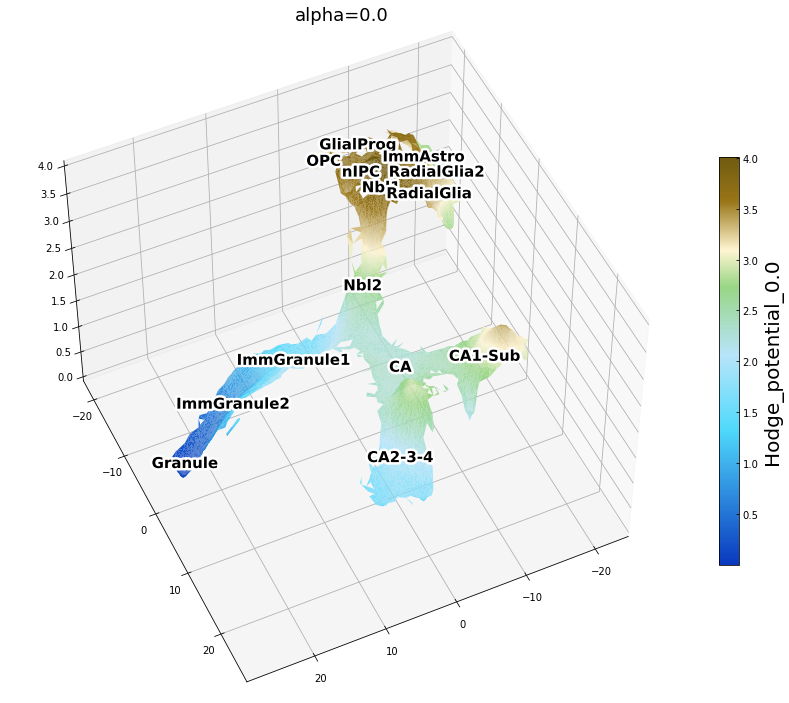

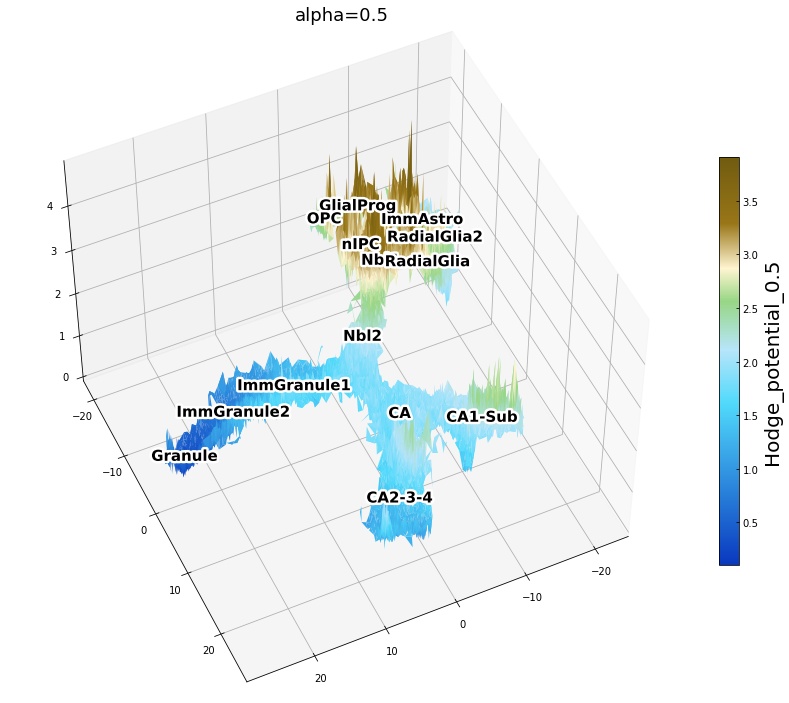

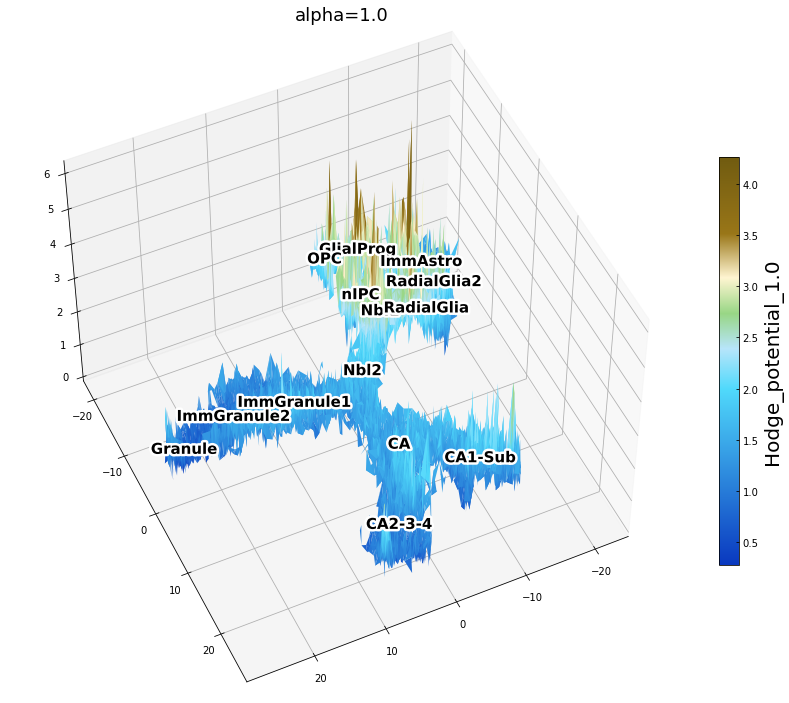

In [17]:
for alpha in alpha_set:
    cellmap.view_surface_3D(adata, basis='X_tsne', cluster_key ='clusters',potential_key='Hodge_potential_%0.1f' % alpha,elev=50,azim=65,title='alpha=%0.1f' % alpha)